<!--NAVIGATION-->
< [Parsing an Existing Model](02.03-Parsing-an-Existing-Model.ipynb) | [Contents](Index.ipynb) | [Simulating a Model](02.05-Simulating-a-Model.ipynb) >

# Geometry Functions

The IDF class exposes methods regarding the geometry of the file thanks to the `geomeppy` package.

Here are some common methods worth knowing:


- [IDF.view_model()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.view_model)
- [IDF.rotate()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.rotate)
- [IDF.translate()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.translate)
- [IDF.translate_to_origin()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.translate_to_origin)
- [IDF.getsurfaces()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.getsurfaces)

In [1]:
from archetypal import IDF

In [2]:
idf = IDF("data/seed_file_V960.idf")

### `view_model`

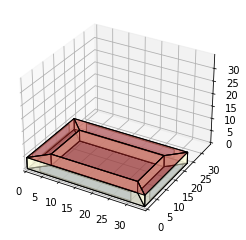

In [3]:
idf.view_model()

### `rotate`

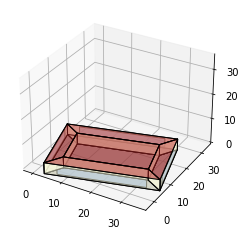

In [4]:
idf.rotate(15)
idf.view_model()

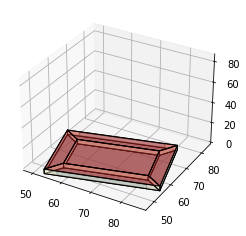

In [5]:
idf.translate((50,50, 0))
idf.view_model()

### `translate_to_origin`

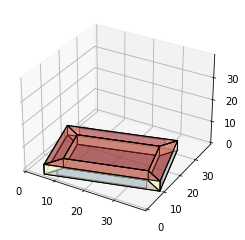

In [6]:
idf.translate_to_origin()
idf.view_model()

### `getsurfaces`

Retrieves surfaces (walls, Floor, Roof, etc.) for all or a certain type:

In [7]:
idf.getsurfaces()

[
 BuildingSurface:Detailed,
     zone_5_Srf_0,             !- Name
     Wall,                     !- Surface Type
     Interior Wall,            !- Construction Name
     zone_5,                   !- Zone Name
     ,                         !- Space Name
     Surface,                  !- Outside Boundary Condition
     zone_7_Srf_2,             !- Outside Boundary Condition Object
     NoSun,                    !- Sun Exposure
     NoWind,                   !- Wind Exposure
     ,                         !- View Factor to Ground
     ,                         !- Number of Vertices
     30.335646393834168,       !- Vertex 1 Xcoordinate
     25.685963145907166,       !- Vertex 1 Ycoordinate
     4.5,                      !- Vertex 1 Zcoordinate
     30.335646393834168,       !- Vertex 2 Xcoordinate
     25.685963145907166,       !- Vertex 2 Ycoordinate
     0,                        !- Vertex 2 Zcoordinate
     5.511351921262147,        !- Vertex 3 Xcoordinate
     19.034313489309113,  

In [8]:
idf.getsurfaces("Wall")

[
 BuildingSurface:Detailed,
     zone_5_Srf_0,             !- Name
     Wall,                     !- Surface Type
     Interior Wall,            !- Construction Name
     zone_5,                   !- Zone Name
     ,                         !- Space Name
     Surface,                  !- Outside Boundary Condition
     zone_7_Srf_2,             !- Outside Boundary Condition Object
     NoSun,                    !- Sun Exposure
     NoWind,                   !- Wind Exposure
     ,                         !- View Factor to Ground
     ,                         !- Number of Vertices
     30.335646393834168,       !- Vertex 1 Xcoordinate
     25.685963145907166,       !- Vertex 1 Ycoordinate
     4.5,                      !- Vertex 1 Zcoordinate
     30.335646393834168,       !- Vertex 2 Xcoordinate
     25.685963145907166,       !- Vertex 2 Ycoordinate
     0,                        !- Vertex 2 Zcoordinate
     5.511351921262147,        !- Vertex 3 Xcoordinate
     19.034313489309113,  

Here is how we could get all the Surface Types used in the model:

In [9]:
list_of_surfaces = []
for surface in idf.getsurfaces():
    list_of_surfaces.append(surface.Surface_Type)

set(list_of_surfaces)

{'Floor', 'Roof', 'Wall'}

In [10]:
roofs = idf.getsurfaces("Roof")

floors = idf.getsurfaces("Floor")

walls = idf.getsurfaces("Wall")

For each surface, other methods area available:

- coords
- area
- azimuth
- height
- tilt

In [11]:
roofs[0].coords

[(33.95911302526946, 12.163001577860207, 4.5),
 (30.335646393834168, 25.685963145907166, 4.5),
 (5.511351921262147, 19.034313489309113, 4.5),
 (9.134818552697439, 5.511351921262147, 4.5)]

In [12]:
roofs[0].area

359.80001068115314

In [13]:
roofs[0].azimuth

0.0

In [14]:
roofs[0].height

14.000000000000004

In [15]:
roofs[0].tilt

0.0

For more information about geometry functions, visit [geomeppy](https://geomeppy.readthedocs.io/en/latest/?)

In [16]:
wall_1 = walls[0]

In [17]:
wall_1


BuildingSurface:Detailed,
    zone_5_Srf_0,             !- Name
    Wall,                     !- Surface Type
    Interior Wall,            !- Construction Name
    zone_5,                   !- Zone Name
    ,                         !- Space Name
    Surface,                  !- Outside Boundary Condition
    zone_7_Srf_2,             !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    ,                         !- View Factor to Ground
    ,                         !- Number of Vertices
    30.335646393834168,       !- Vertex 1 Xcoordinate
    25.685963145907166,       !- Vertex 1 Ycoordinate
    4.5,                      !- Vertex 1 Zcoordinate
    30.335646393834168,       !- Vertex 2 Xcoordinate
    25.685963145907166,       !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    5.511351921262147,        !- Vertex 3 Xcoordinate
    19.034313489309113,       !- Vertex 3 Ycoo

In [18]:
contruction = wall_1.get_referenced_object("Construction_Name")

In [19]:
contruction


Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    Material Air Gap 1,       !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3

In [20]:
contruction.fieldnames

['key',
 'Name',
 'Outside_Layer',
 'Layer_2',
 'Layer_3',
 'Layer_4',
 'Layer_5',
 'Layer_6',
 'Layer_7',
 'Layer_8',
 'Layer_9',
 'Layer_10']

In [21]:
mat_of_construction = []
for n in contruction.fieldnames:
    if n == "key" or n == "Name":
        pass
    else:
        print(n)
        mat = contruction.get_referenced_object(n)
        if mat is None:
            continue
        mat_of_construction.append(mat)

Outside_Layer
Layer_2
Layer_3
Layer_4
Layer_5
Layer_6
Layer_7
Layer_8
Layer_9
Layer_10


In [22]:
mat_of_construction

[
 Material,
     G01a 19mm gypsum board,    !- Name
     MediumSmooth,             !- Roughness
     0.019,                    !- Thickness
     0.16,                     !- Conductivity
     800,                      !- Density
     1090,                     !- Specific Heat
     0.9,                      !- Thermal Absorptance
     0.7,                      !- Solar Absorptance
     0.7;                      !- Visible Absorptance,
 
 Material:AirGap,
     Material Air Gap 1,       !- Name
     0.15;                     !- Thermal Resistance,
 
 Material,
     G01a 19mm gypsum board,    !- Name
     MediumSmooth,             !- Roughness
     0.019,                    !- Thickness
     0.16,                     !- Conductivity
     800,                      !- Density
     1090,                     !- Specific Heat
     0.9,                      !- Thermal Absorptance
     0.7,                      !- Solar Absorptance
     0.7;                      !- Visible Absorptance]

In [23]:
sum(
    list(
        map(
            lambda mat: mat.Thickness if mat.key.upper() == "MATERIAL" else 0,
            mat_of_construction,
        )
    )
)

0.038

<!--NAVIGATION-->
< [Parsing an Existing Model](02.03-Parsing-an-Existing-Model.ipynb) | [Contents](Index.ipynb) | [Simulating a Model](02.05-Simulating-a-Model.ipynb) >